In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [29]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [30]:
dataframe = pd.read_csv("../dataset/AirPassengers.csv", usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float')

In [31]:
dataset

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.],
       [104.],
       [118.],
       [115.],
       [126.],
       [141.],
       [135.],
       [125.],
       [149.],
       [170.],
       [170.],
       [158.],
       [133.],
       [114.],
       [140.],
       [145.],
       [150.],
       [178.],
       [163.],
       [172.],
       [178.],
       [199.],
       [199.],
       [184.],
       [162.],
       [146.],
       [166.],
       [171.],
       [180.],
       [193.],
       [181.],
       [183.],
       [218.],
       [230.],
       [242.],
       [209.],
       [191.],
       [172.],
       [194.],
       [196.],
       [196.],
       [236.],
       [235.],
       [229.],
       [243.],
       [264.],
       [272.],
       [237.],
       [211.],
       [180.],
       [201.],
       [204.],
       [188.],
       [235.],
       [227.],
       [234.],
       [264.],
       [30

In [32]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [33]:
train_size = int(len(dataset) * 0.67)
test_size =  len(dataset) - train_size
train , test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [34]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test,look_back)


In [35]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [36]:
trainX.shape

(94, 1, 1)

In [37]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX,trainY,epochs=100,batch_size=1,verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0500 - 982ms/epoch - 10ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0241 - 83ms/epoch - 886us/step
Epoch 3/100
94/94 - 0s - loss: 0.0177 - 68ms/epoch - 728us/step
Epoch 4/100
94/94 - 0s - loss: 0.0164 - 82ms/epoch - 867us/step
Epoch 5/100
94/94 - 0s - loss: 0.0153 - 83ms/epoch - 887us/step
Epoch 6/100
94/94 - 0s - loss: 0.0142 - 82ms/epoch - 876us/step
Epoch 7/100
94/94 - 0s - loss: 0.0131 - 67ms/epoch - 709us/step
Epoch 8/100
94/94 - 0s - loss: 0.0122 - 83ms/epoch - 887us/step
Epoch 9/100
94/94 - 0s - loss: 0.0113 - 83ms/epoch - 885us/step
Epoch 10/100
94/94 - 0s - loss: 0.0102 - 67ms/epoch - 709us/step
Epoch 11/100
94/94 - 0s - loss: 0.0093 - 83ms/epoch - 886us/step
Epoch 12/100
94/94 - 0s - loss: 0.0084 - 83ms/epoch - 886us/step
Epoch 13/100
94/94 - 0s - loss: 0.0075 - 83ms/epoch - 886us/step
Epoch 14/100
94/94 - 0s - loss: 0.0067 - 82ms/epoch - 876us/step
Epoch 15/100
94/94 - 0s - loss: 0.0060 - 67ms/epoch - 708us/step
Epoch 16/100
94/94 - 0s - loss: 0.

2/2 [==============================] - 0s 15ms/step
23.184395700642447
23.184395700642447


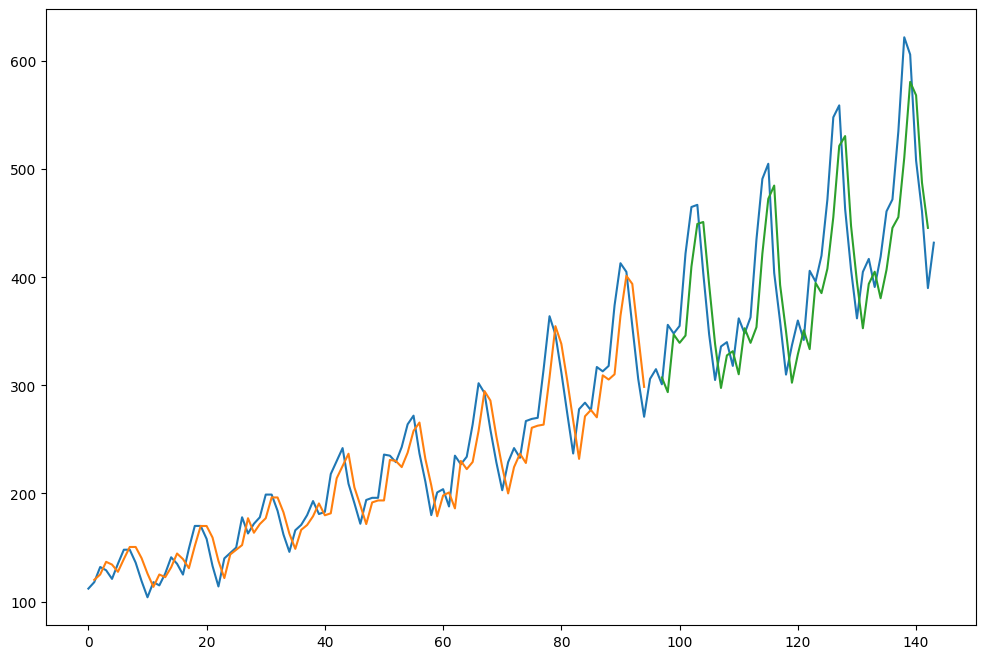

In [38]:
trainPredict = model.predict(trainX)
testPredict =model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY =  scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY =  scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print(trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print(trainScore)


trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[ : , :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+ look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[ : , :] = np.nan
testPredictPlot[len(trainPredict) + (look_back*2)+1:len(dataset)-1, :] = testPredict

plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()